In [1]:
import torch
from torch.utils.data import TensorDataset, DataLoader

In [2]:
device=torch.device('cpu')
learning_rate=1e-4

In [3]:
# Step 1. Prepare data-1/2
# DataLoader wraps a Dataset and provides minibatches, shuffling, multithreading, for you
x=torch.randn(64, 6724, device=device) #Input dimension of 1000
y=torch.randn(64, 6724, device=device) #Output dimension of 10 i.e, ground-truth dimension
loader=DataLoader(TensorDataset(x, y), batch_size=8)

In [4]:
# Step 2. Create model 建立model習慣建立class
class TwoLayerNet(torch.nn.Module):
    def __init__(self, D_in, H, B, D_out):
        super(TwoLayerNet, self).__init__()
        self.linear_1=torch.nn.Linear(D_in, H)
        self.linear_2=torch.nn.Linear(H, B)
        self.linear_3=torch.nn.Linear(B, D_out)
    
    # Step 3. Forward pass-1/2    # Step 4. Backward pass-1/2
    def forward(self, x):
        h=self.linear_1(x)
        h_relu=torch.nn.functional.relu(h) #為何activation and hidden layer 的實現方式不同
        b=self.linear_2(h_relu) 
        b_relu=torch.nn.functional.relu(b)
        y_pred=self.linear_3(b_relu) 
        return y_pred
    
model= TwoLayerNet(D_in=6724, H=1000, B=100, D_out=6724)
model=model.to(device) #這行是什麼意思? A:将模型加载到相应的设备

In [5]:
optimizer=torch.optim.Adam(model.parameters(), lr=learning_rate)

Epochs:  0 ; Loss:  1.0086227655410767
Epochs:  0 ; Loss:  1.0131409168243408
Epochs:  0 ; Loss:  1.0139200687408447
Epochs:  0 ; Loss:  1.0070782899856567
Epochs:  0 ; Loss:  1.0071799755096436
Epochs:  0 ; Loss:  1.0058646202087402
Epochs:  0 ; Loss:  1.0075047016143799
Epochs:  0 ; Loss:  1.0086654424667358
Epochs:  100 ; Loss:  0.5102664828300476
Epochs:  100 ; Loss:  0.51584392786026
Epochs:  100 ; Loss:  0.5135665535926819
Epochs:  100 ; Loss:  0.5940473675727844
Epochs:  100 ; Loss:  0.586678147315979
Epochs:  100 ; Loss:  0.5477784276008606
Epochs:  100 ; Loss:  0.5792096257209778
Epochs:  100 ; Loss:  0.587497353553772
Epochs:  200 ; Loss:  0.18174192309379578
Epochs:  200 ; Loss:  0.17176754772663116
Epochs:  200 ; Loss:  0.17608727514743805
Epochs:  200 ; Loss:  0.21699178218841553
Epochs:  200 ; Loss:  0.24176450073719025
Epochs:  200 ; Loss:  0.21093463897705078
Epochs:  200 ; Loss:  0.2151733636856079
Epochs:  200 ; Loss:  0.21639111638069153
Epochs:  300 ; Loss:  0.05432

Text(0, 0.5, 'loss')

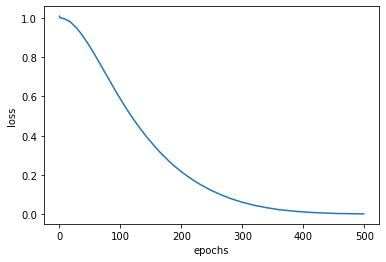

In [6]:
# Step 1. Prepare data-2/2
# Iterate over loader to form mini-batches
# Batch aims to deal with memory limitation in GPU

loss_epoch=[]
loss_values = []

for epochs in range(500):
    # Step 3. Forward pass-2/2  
    # Feed data to model, and compute loss
    
    for x_batch, y_batch in loader:
        y_pred=model(x_batch) #為何不是 model.forward(x_batch) #Forward 過程中同時建立computational graph
        loss=torch.nn.functional.mse_loss(y_pred, y_batch) #Loss functions 是被定義在torch.nn.functional中
        
        # Step 4. Backward pass-2/2
        # Compute gradient of loss wrt all model weights
        loss.backward()
        
        # Step 5. Update Weights
        optimizer.step()
        optimizer.zero_grad() #此步為清空，否則會影響下一步gradient的計算
        if epochs%100==0:
            print("Epochs: ", epochs, "; Loss: ", loss.item())
    
    loss_epoch.append(epochs)
    loss_values.append(loss.item())

    if loss<1e-6: #stop training criterion
        print("Epochs: ", epochs, "; Loss: ", loss.item())
        break


#Plot loss function
from matplotlib import pyplot as plt
plt.plot(loss_epoch, loss_values)
plt.xlabel('epochs')
plt.ylabel('loss')

In [7]:
PATH= "01_model.pth"
torch.save(model.state_dict(), PATH)

In [9]:
PATH2= "01_model_jit.pth"
traced_net=torch.jit.trace(model, torch.randn(1,6724))
torch.jit.save(traced_net, PATH2)